In [36]:
pip install pytrends matplotlib pandas seaborn plotly

Note: you may need to restart the kernel to use updated packages.


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

# Setup pytrend library and keyword define

In [38]:
pytrends = TrendReq(hl = 'en-US' , tz = 360)
keyword = "artificial intelligence"

# Data Request

In [39]:
pytrends.build_payload([keyword], cat = 0, timeframe = 'today 12-m', geo = '', gprop = '')

# country wise interest

In [40]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by = keyword, ascending= False).head(15)

C:\Users\jainv\AppData\Local\Temp\ipykernel_19512\1790268562.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




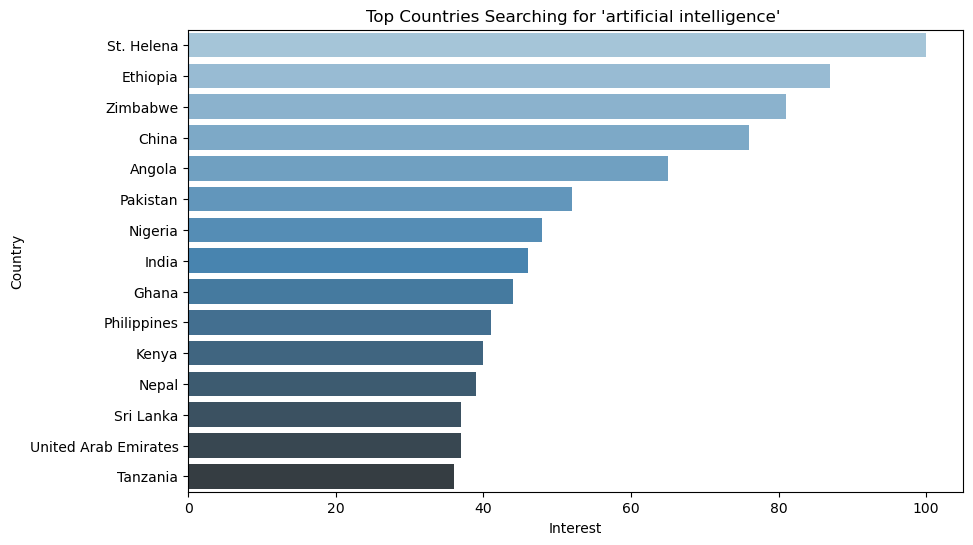

In [41]:
plt.figure(figsize = (10,6))
sns.barplot(x = region_data[keyword], y = region_data.index, palette = "Blues_d")
plt.title(f"Top Countries Searching for '{keyword}' ")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()

# World Map

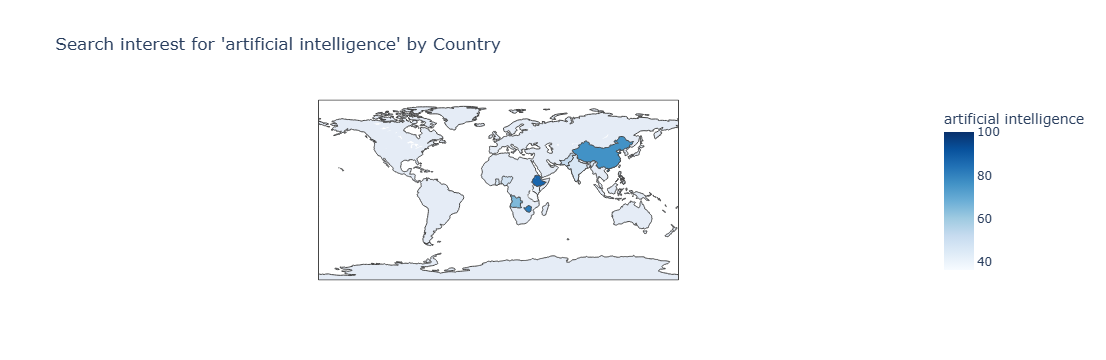

In [42]:
region_data = region_data.reset_index()
fig = px.choropleth(region_data,
                    locations='geoName',
                    locationmode='country names',
                    color=keyword,
                    title=f"Search interest for '{keyword}' by Country",
                    color_continuous_scale='Blues')
fig.show()
                    
                    

# Time wise Interest

In [43]:
time_df = pytrends.interest_over_time()

C:\Users\jainv\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



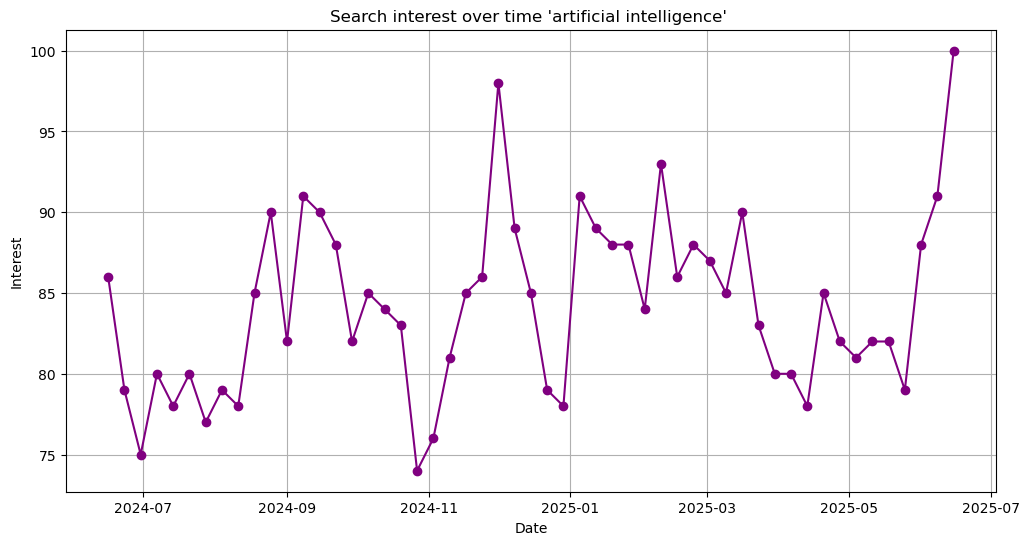

In [44]:
plt.figure(figsize=(12,6))
plt.plot(time_df.index, time_df[keyword], marker = 'o' , color = 'purple')
plt.title(f"Search interest over time '{keyword}' ")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.show()

# Multiple keywords compare

In [45]:
kw_list = ["machine learning","deep learning","artificial intelligence","data science"]
pytrends.build_payload(kw_list, cat = 0, timeframe= 'today 12-m', geo = '' ,gprop='')

C:\Users\jainv\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



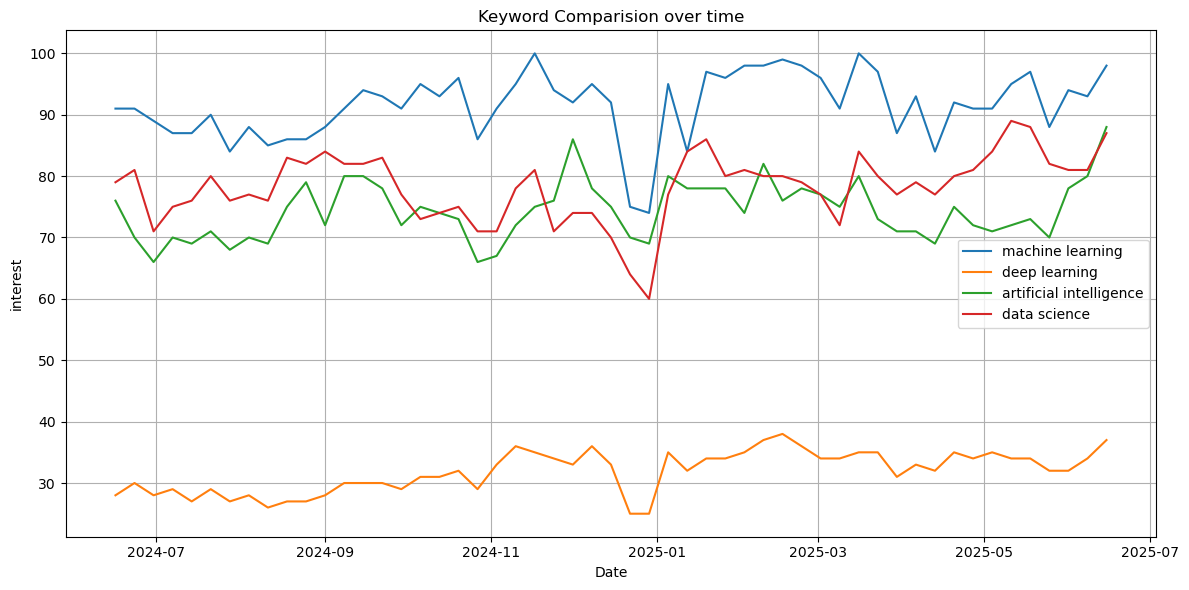

In [46]:
compare_df = pytrends.interest_over_time()

plt.figure(figsize=(12,6))
for kw in kw_list:
    plt.plot(compare_df.index, compare_df[kw], label = kw)

plt.title("Keyword Comparision over time")
plt.xlabel("Date")
plt.ylabel("interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()